In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA INTO DATA FRAMES

In [144]:
dim_city=pd.read_csv("dim_city.csv")
city_target_passenger_rating=pd.read_csv("city_target_passenger_rating.csv")
dim_date=pd.read_csv("dim_date.csv")
dim_repeat_trip_distribution=pd.read_csv("dim_repeat_trip_distribution.csv")
fact_passenger_summary=pd.read_csv("fact_passenger_summary.csv")
fact_trips=pd.read_csv("fact_trips.csv")
monthly_target_trips=pd.read_csv("monthly_target_trips.csv")
monthly_target_new_passengers=pd.read_csv("monthly_target_new_passengers.csv")


In [ ]:
# tables over

In [187]:
dim_city.columns

Index(['city_id', 'city_name'], dtype='object')

In [188]:
city_target_passenger_rating.columns

Index(['city_id', 'target_avg_passenger_rating'], dtype='object')

In [189]:
dim_repeat_trip_distribution.columns

Index(['month', 'city_id', 'trip_count', 'repeat_passenger_count'], dtype='object')

In [190]:
fact_passenger_summary.columns

Index(['month', 'city_id', 'new_passengers', 'repeat_passengers',
       'total_passengers', 'rpr_perc'],
      dtype='object')

In [191]:
fact_trips.columns

Index(['trip_id', 'date', 'city_id', 'passenger_type',
       'distance_travelled(km)', 'fare_amount', 'passenger_rating',
       'driver_rating', 'day_type', 'month'],
      dtype='object')

In [192]:
monthly_target_trips.columns


Index(['month', 'city_id', 'total_target_trips'], dtype='object')

In [193]:
monthly_target_new_passengers.columns

Index(['month', 'city_id', 'target_new_passengers'], dtype='object')

In [195]:
dim_date.columns

Index(['date', 'start_of_month', 'month_name', 'day_type'], dtype='object')

# ANALYSIS

# Top and Bottom performing cities by total trips

In [93]:
# total trips by citites

city_trip_counts= fact_trips.groupby("city_id")["trip_id"].count().reset_index(name="trip_count")

city_trip_counts=city_trip_counts.merge(dim_city,on="city_id")

In [94]:
city_trip_counts

,city_id,trip_count,city_name
0,AP01,28366,Visakhapatnam
1,CH01,38981,Chandigarh
2,GJ01,54843,Surat
3,GJ02,32026,Vadodara
4,KA01,16238,Mysore
5,KL01,50702,Kochi
6,MP01,42456,Indore
7,RJ01,76888,Jaipur
8,TN01,21104,Coimbatore
9,UP01,64299,Lucknow


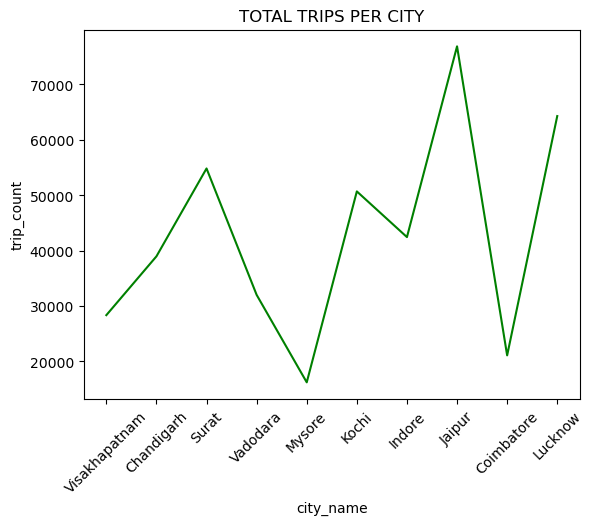

In [95]:
df=pd.DataFrame(city_trip_counts,columns=["city_name","trip_count"])
df

sns.lineplot(data=df,x="city_name",y="trip_count",color="green")
plt.xticks(rotation=45)
plt.title("TOTAL TRIPS PER CITY")
plt.show()

In [96]:
# top three cities
top_cities= city_trip_counts.sort_values(by="trip_count",ascending=False).head(3)
top_cities

,city_id,trip_count,city_name
7,RJ01,76888,Jaipur
9,UP01,64299,Lucknow
2,GJ01,54843,Surat


In [97]:
# bottom three cities
bottom_cities=city_trip_counts.sort_values(by="trip_count").head(3)
bottom_cities

,city_id,trip_count,city_name
4,KA01,16238,Mysore
8,TN01,21104,Coimbatore
0,AP01,28366,Visakhapatnam


# Average fare per trip and distance comparision

In [83]:
fare_distance_avg = fact_trips.groupby("city_id").agg({"fare_amount":"mean" , "distance_travelled(km)":"mean"}).reset_index()

fare_distance_avg=fare_distance_avg.rename(columns={"fare_amount":"avg_fare","distance_travelled(km)":"avg_distance"})

fare_distance_avg =fare_distance_avg.merge(dim_city,on="city_id")
 

In [98]:
fare_distance_avg 

,city_id,avg_fare,avg_distance,city_name
0,AP01,282.672284,22.553938,Visakhapatnam
1,CH01,283.686950,23.518714,Chandigarh
2,GJ01,117.272925,10.997247,Surat
3,GJ02,118.566165,11.517736,Vadodara
4,KA01,249.707168,16.496921,Mysore
5,KL01,335.245079,24.065461,Kochi
6,MP01,179.838609,16.502473,Indore
7,RJ01,483.918128,30.023125,Jaipur
8,TN01,166.982183,14.979198,Coimbatore
9,UP01,147.180376,12.512963,Lucknow


In [99]:
# cities with highest average fare
highest_fare_city = fare_distance_avg.sort_values(by="avg_fare",ascending=False).head(3)
highest_fare_city

,city_id,avg_fare,avg_distance,city_name
7,RJ01,483.918128,30.023125,Jaipur
5,KL01,335.245079,24.065461,Kochi
1,CH01,283.686950,23.518714,Chandigarh


In [100]:
# cities with lowest average fare
lowest_fare_city=fare_distance_avg.sort_values(by="avg_fare").head(3)
lowest_fare_city

,city_id,avg_fare,avg_distance,city_name
2,GJ01,117.272925,10.997247,Surat
3,GJ02,118.566165,11.517736,Vadodara
9,UP01,147.180376,12.512963,Lucknow


# Average ratings by city and passenger type

In [101]:
ratings=fact_trips.groupby(["city_id","passenger_type"]).agg({"passenger_rating":"mean","driver_rating":"mean"}).reset_index()

ratings=ratings.rename(columns={"passenger_rating":"avg_passenger_rating","driver_rating":"avg_driver_rating"})

ratings=ratings.merge(dim_city,on="city_id")

In [102]:
ratings

,city_id,passenger_type,avg_passenger_rating,avg_driver_rating,city_name
0,AP01,new,8.976151,8.979995,Visakhapatnam
1,AP01,repeated,7.989628,8.992701,Visakhapatnam
2,CH01,new,8.489158,7.992120,Chandigarh
3,CH01,repeated,7.493798,7.472824,Chandigarh
4,GJ01,new,7.984173,6.994925,Surat
5,GJ01,repeated,5.995511,6.479441,Surat
6,GJ02,new,7.979263,7.004147,Vadodara
7,GJ02,repeated,5.978629,6.481072,Vadodara
8,KA01,new,8.982964,8.982878,Mysore
9,KA01,repeated,7.978495,8.965767,Mysore


In [105]:
# city with highest rating
highest_city_ratings=ratings.sort_values("avg_passenger_rating",ascending=False).head(1)
highest_city_ratings

,city_id,passenger_type,avg_passenger_rating,avg_driver_rating,city_name
10,KL01,new,8.987394,8.98535,Kochi


In [107]:
# city with lowest rating
lowest_city_ratings=ratings.sort_values(by="avg_passenger_rating").head(1)
lowest_city_ratings

,city_id,passenger_type,avg_passenger_rating,avg_driver_rating,city_name
7,GJ02,repeated,5.978629,6.481072,Vadodara


# Peak and Low demand months by city

In [119]:
fact_trips["month"]= pd.to_datetime(fact_trips["date"]).dt.to_period("M").astype(str)

monthly_trips=fact_trips.groupby(["city_id","month"])["trip_id"].count().reset_index(name="trip_count")

monthly_trips= monthly_trips.merge(dim_city,on="city_id")

In [122]:
# peak month for each city
peak_month=monthly_trips.loc[monthly_trips.groupby("city_id")["trip_count"].idxmax()]
peak_month

,city_id,month,trip_count,city_name
3,AP01,2024-04,4938,Visakhapatnam
7,CH01,2024-02,7387,Chandigarh
15,GJ01,2024-04,9831,Surat
21,GJ02,2024-04,5941,Vadodara
28,KA01,2024-05,3007,Mysore
34,KL01,2024-05,10014,Kochi
40,MP01,2024-05,7787,Indore
43,RJ01,2024-02,15872,Jaipur
50,TN01,2024-03,3680,Coimbatore
55,UP01,2024-02,12060,Lucknow


In [123]:
# low month for each city
low_month=monthly_trips.loc[monthly_trips.groupby("city_id")["trip_count"].idxmin()]
low_month

,city_id,month,trip_count,city_name
0,AP01,2024-01,4468,Visakhapatnam
9,CH01,2024-04,5566,Chandigarh
12,GJ01,2024-01,8358,Surat
23,GJ02,2024-06,4685,Vadodara
24,KA01,2024-01,2485,Mysore
35,KL01,2024-06,6399,Kochi
41,MP01,2024-06,6288,Indore
47,RJ01,2024-06,9842,Jaipur
53,TN01,2024-06,3158,Coimbatore
58,UP01,2024-05,9705,Lucknow


# Weekend v/s Weelday demand

In [145]:
#merge to get day type

fact_trips=fact_trips.merge(dim_date[["date","day_type"]],on="date")

week_trips=fact_trips.groupby(["city_id","day_type"])["trip_id"].count().unstack().reset_index()

In [146]:
week_trips=week_trips.merge(dim_city,on="city_id")
week_trips

,city_id,Weekday,Weekend,city_name
0,AP01,15100,13266,Visakhapatnam
1,CH01,19914,19067,Chandigarh
2,GJ01,37793,17050,Surat
3,GJ02,20310,11716,Vadodara
4,KA01,6424,9814,Mysore
5,KL01,22915,27787,Kochi
6,MP01,21198,21258,Indore
7,RJ01,32491,44397,Jaipur
8,TN01,12576,8528,Coimbatore
9,UP01,49617,14682,Lucknow


       city_name  Weekday  Weekend
0  Visakhapatnam    15100    13266
1     Chandigarh    19914    19067
2          Surat    37793    17050
3       Vadodara    20310    11716
4         Mysore     6424     9814
5          Kochi    22915    27787
6         Indore    21198    21258
7         Jaipur    32491    44397
8     Coimbatore    12576     8528
9        Lucknow    49617    14682


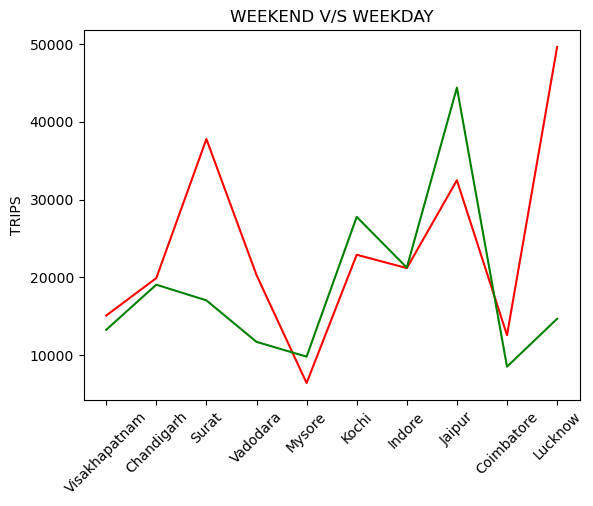

In [147]:
df=pd.DataFrame(week_trips,columns=["city_name","Weekday","Weekend"])
print(df)

plt.plot(df["city_name"],df["Weekday"],color="red" , label="weekday")
plt.plot(df["city_name"],df["Weekend"],color="green" , label="weekday")
plt.xticks(rotation=45)
plt.ylabel("TRIPS")
plt.title("WEEKEND V/S WEEKDAY")
plt.show()

# Repeat passenger frequency and city contribution

In [148]:
repeat_freq=dim_repeat_trip_distribution.copy()

total_repeat_by_city = repeat_freq.groupby("city_id")["repeat_passenger_count"].sum().reset_index()

repeat_freq=repeat_freq.merge(total_repeat_by_city,on="city_id",suffixes=("","_total"))

repeat_freq["percentage"]=(repeat_freq["repeat_passenger_count"]/repeat_freq["repeat_passenger_count_total"])*100

repeat_freq=repeat_freq.merge(dim_city,on="city_id")


In [149]:
repeat_freq


,month,city_id,trip_count,repeat_passenger_count,repeat_passenger_count_total,percentage,city_name
0,2024-01-01,AP01,10-Trips,7,5108,0.137040,Visakhapatnam
1,2024-01-01,AP01,2-Trips,352,5108,6.891151,Visakhapatnam
2,2024-01-01,AP01,3-Trips,158,5108,3.093187,Visakhapatnam
3,2024-01-01,AP01,4-Trips,53,5108,1.037588,Visakhapatnam
4,2024-01-01,AP01,5-Trips,38,5108,0.743931,Visakhapatnam
...,...,...,...,...,...,...,...
535,2024-06-01,UP01,5-Trips,272,9597,2.834219,Lucknow
536,2024-06-01,UP01,6-Trips,272,9597,2.834219,Lucknow
537,2024-06-01,UP01,7-Trips,246,9597,2.563301,Lucknow
538,2024-06-01,UP01,8-Trips,83,9597,0.864854,Lucknow


# Monthly target achievement analysis





In [150]:
# merge summaries and targets
summary_targets= fact_passenger_summary.merge(monthly_target_new_passengers,on=["city_id","month"],how="left")

summary_targets=summary_targets.merge(monthly_target_trips,on=["city_id","month"],how="left")

In [151]:
summary_targets["month"]=pd.to_datetime(summary_targets["month"]).dt.to_period("M").astype(str)

In [153]:
# new passengers target and actual analysis
summary_targets["new_passenger_diff_perc"]=((summary_targets["new_passengers"]-summary_targets["target_new_passengers"])
                                            /summary_targets["target_new_passengers"])*100



In [156]:
#adding month column in fact_trips table for further analysis
fact_trips["month"]=pd.to_datetime(fact_trips["date"]).dt.to_period("M").astype(str)

In [157]:
fact_trips

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,day_type,month
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Weekend,2024-01
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Weekday,2024-01
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Weekend,2024-01
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Weekday,2024-03
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Weekend,2024-06
...,...,...,...,...,...,...,...,...,...,...
425898,TRPLUC2403180b02b4d0,2024-03-18,UP01,repeated,12,134,5,5,Weekday,2024-03
425899,TRPVAD2401032679e669,2024-01-03,GJ02,repeated,12,114,7,5,Weekday,2024-01
425900,TRPJAI24022578e10280,2024-02-25,RJ01,repeated,26,479,7,10,Weekend,2024-02
425901,TRPJAI240401e297ad20,2024-04-01,RJ01,repeated,27,361,7,10,Weekday,2024-04


In [160]:
# grouping data of fact_trips table to get actual trip count
trips=fact_trips.groupby(["city_id","month"])["trip_id"].count().reset_index()


In [162]:
# merging summary_targets with trips 
summary_targets=summary_targets.merge(trips,on=["city_id","month"],how="left")

In [163]:
summary_targets=summary_targets.rename(columns={"trip_id":"actual_trip_count"})

In [164]:
#actual and target trips analysis
summary_targets["trip_diff_perc"]= ((summary_targets["actual_trip_count"]-summary_targets["total_target_trips"])
                                    /summary_targets["total_target_trips"])*100


In [165]:
summary_targets=summary_targets.merge(dim_city,on="city_id")

In [167]:
summary_targets[["month","city_name","new_passengers","target_new_passengers","new_passenger_diff_perc","actual_trip_count"
                 ,"total_target_trips","trip_diff_perc"]]


,month,city_name,new_passengers,target_new_passengers,new_passenger_diff_perc,actual_trip_count,total_target_trips,trip_diff_perc
0,2024-01,Visakhapatnam,2513,2500,0.520000,4468,4500,-0.711111
1,2024-01,Chandigarh,3920,4000,-2.000000,6810,7000,-2.714286
2,2024-01,Surat,2432,2000,21.600000,8358,9000,-7.133333
3,2024-01,Vadodara,2089,1800,16.055556,4775,6000,-20.416667
4,2024-01,Mysore,1957,2000,-2.150000,2485,2000,24.250000
5,2024-01,Kochi,4865,5000,-2.700000,7344,7500,-2.080000
6,2024-01,Indore,2843,2700,5.296296,6737,7000,-3.757143
7,2024-01,Jaipur,10423,12000,-13.141667,14976,13000,15.200000
8,2024-01,Coimbatore,1822,1500,21.466667,3651,3500,4.314286
9,2024-01,Lucknow,3465,3200,8.281250,10858,13000,-16.476923


In [168]:
#actual v/s target ratings

rating_monthly=fact_trips.groupby(["city_id","month"])["passenger_rating"].mean().reset_index()
rating_monthly=rating_monthly.merge(city_target_passenger_rating,on="city_id",how="left")
rating_monthly=rating_monthly.rename(columns={"passenger_rating":"avg_passenger_rating"})

In [169]:
rating_monthly["rating_diff_perc"]=((rating_monthly["avg_passenger_rating"]-rating_monthly["target_avg_passenger_rating"])
                                    /rating_monthly["target_avg_passenger_rating"]*100)

In [170]:
rating_monthly


,city_id,month,avg_passenger_rating,target_avg_passenger_rating,rating_diff_perc
0,AP01,2024-01,8.553939,8.50,0.634578
1,AP01,2024-02,8.465262,8.50,-0.408684
2,AP01,2024-03,8.426287,8.50,-0.867216
3,AP01,2024-04,8.370595,8.50,-1.522407
4,AP01,2024-05,8.387781,8.50,-1.320229
5,AP01,2024-06,8.402188,8.50,-1.150724
6,CH01,2024-01,8.068135,8.00,0.851689
7,CH01,2024-02,8.027210,8.00,0.340125
8,CH01,2024-03,7.995129,8.00,-0.060892
9,CH01,2024-04,7.944484,8.00,-0.693945


# Highest and Lowest repeat passenger rate(RPR) for each city across 6 months period

In [171]:
# calculate rpr % for each city and month
fact_passenger_summary["rpr_perc"]=(fact_passenger_summary["repeat_passengers"]/fact_passenger_summary["total_passengers"])*100

In [172]:
fact_passenger_summary

,month,city_id,new_passengers,repeat_passengers,total_passengers,rpr_perc
0,2024-01-01,AP01,2513,650,3163,20.550111
1,2024-01-01,CH01,3920,720,4640,15.517241
2,2024-01-01,GJ01,2432,1184,3616,32.743363
3,2024-01-01,GJ02,2089,544,2633,20.660843
4,2024-01-01,KA01,1957,172,2129,8.078910
5,2024-01-01,KL01,4865,795,5660,14.045936
6,2024-01-01,MP01,2843,1033,3876,26.651187
7,2024-01-01,RJ01,10423,1422,11845,12.005065
8,2024-01-01,TN01,1822,392,2214,17.705510
9,2024-01-01,UP01,3465,1431,4896,29.227941


In [173]:
# grouping data to get combined average 
avg_rpr_city=fact_passenger_summary.groupby("city_id")["rpr_perc"].mean().reset_index(name="rpr_perc_mean")


In [174]:
avg_rpr_city

,city_id,rpr_perc_mean
0,AP01,28.811272
1,CH01,21.750782
2,GJ01,42.963123
3,GJ02,30.793795
4,KA01,11.208195
5,KL01,22.376614
6,MP01,32.957829
7,RJ01,18.329207
8,TN01,23.671272
9,UP01,38.131873


In [175]:
# top 2 cities by average rpr percentage 
top2_rpr_city=avg_rpr_city.sort_values(by="rpr_perc_mean",ascending=False ).head(2).merge(dim_city,on="city_id")

top2_rpr_city

,city_id,rpr_perc_mean,city_name
0,GJ01,42.963123,Surat
1,UP01,38.131873,Lucknow


In [176]:
# bottom 2 cities by average rpr percentage
bottom2_rpr_city=avg_rpr_city.sort_values(by="rpr_perc_mean" ).head(2).merge(dim_city,on="city_id")

bottom2_rpr_city


,city_id,rpr_perc_mean,city_name
0,KA01,11.208195,Mysore
1,RJ01,18.329207,Jaipur


# RPR% by month across all cities

In [177]:
# grouping to get combined average by city and month
avg_rpr_month=fact_passenger_summary.groupby(["city_id","month"])["rpr_perc"].mean().reset_index()

In [178]:
avg_rpr_month

,city_id,month,rpr_perc
0,AP01,2024-01-01,20.550111
1,AP01,2024-02-01,24.921136
2,AP01,2024-03-01,29.841578
3,AP01,2024-04-01,34.966514
4,AP01,2024-05-01,32.906574
5,AP01,2024-06-01,29.681717
6,CH01,2024-01-01,15.517241
7,CH01,2024-02-01,17.207989
8,CH01,2024-03-01,21.268293
9,CH01,2024-04-01,24.018265


In [179]:
# sorting avg_rpr_month by descending values of rpr_perc
avg_rpr_month_sorted=avg_rpr_month.sort_values(["city_id","rpr_perc"],ascending=[True,False])

top_rpr_month_per_city=avg_rpr_month_sorted.drop_duplicates(subset="city_id",keep="first")

top_rpr_month_per_city=top_rpr_month_per_city.merge(dim_city,on="city_id")
top_rpr_month_per_city

,city_id,month,rpr_perc,city_name
0,AP01,2024-04-01,34.966514,Visakhapatnam
1,CH01,2024-06-01,26.296633,Chandigarh
2,GJ01,2024-05-01,49.922288,Surat
3,GJ02,2024-06-01,38.904261,Vadodara
4,KA01,2024-05-01,15.374449,Mysore
5,KL01,2024-05-01,29.781421,Kochi
6,MP01,2024-05-01,43.525480,Indore
7,RJ01,2024-05-01,25.676052,Jaipur
8,TN01,2024-05-01,32.663642,Coimbatore
9,UP01,2024-05-01,47.662747,Lucknow


In [180]:
# sorting avg_rpr_month by ascending values of rpr_perc
avg_rpr_month_sorted_asc=avg_rpr_month.sort_values(["city_id","rpr_perc"],ascending=[True,True])

bottom_rpr_month_per_city=avg_rpr_month_sorted_asc.drop_duplicates(subset="city_id",keep="first")
bottom_rpr_month_per_city=bottom_rpr_month_per_city.merge(dim_city,on="city_id")

bottom_rpr_month_per_city

,city_id,month,rpr_perc,city_name
0,AP01,2024-01-01,20.550111,Visakhapatnam
1,CH01,2024-01-01,15.517241,Chandigarh
2,GJ01,2024-01-01,32.743363,Surat
3,GJ02,2024-01-01,20.660843,Vadodara
4,KA01,2024-02-01,7.991266,Mysore
5,KL01,2024-01-01,14.045936,Kochi
6,MP01,2024-01-01,26.651187,Indore
7,RJ01,2024-01-01,12.005065,Jaipur
8,TN01,2024-02-01,17.360763,Coimbatore
9,UP01,2024-01-01,29.227941,Lucknow
